In [1]:
import datetime
import os
import backtrader as bt

In [2]:
class MyStrat(bt.Strategy):
    def __init__(self):
        self.spy_orders = []
        self.gld_orders = []
        self.uso_orders = []
        
    def next(self):
        
        if self.dnames['spy'].close[0] < 255:
            # if spy is below 255 we want to hold 7 shares
            spy_order = self.order_target_size(data=self.dnames['spy'], target=7)
            self.spy_orders.append(spy_order)
        elif self.dnames['spy'].close[0] < 285:
            # if spy is below 285 but not 255 we want to hold 5 shares
            spy_order = self.order_target_size(data=self.dnames['spy'], target=5)
            self.spy_orders.append(spy_order)
        else:
            # otherwise we will hold 3 shares
            spy_order = self.order_target_size(data=self.dnames['spy'], target=3)
            self.spy_orders.append(spy_order)
        
        # keep 45% of portfolio in gold
        gld_order = self.order_target_percent(data=self.dnames['gld'], target=.45)
        self.gld_orders.append(gld_order)
        
        # keep $1000 worth of oil
        uso_order = self.order_target_value(data=self.dnames['uso'], target=1000)
        self.uso_orders.append(uso_order)
# self.order_target_percent(data=self.dnames['uso'], target=.25)
    

In [3]:
cerebro = bt.Cerebro()

cerebro.addstrategy(MyStrat)

fromdate, todate = datetime.datetime(2019, 6, 15), datetime.datetime(2020, 6, 1)
folder = 'ETF'
for file in os.listdir(folder):
    dn = os.path.join(folder, file)
    data = bt.feeds.GenericCSVData(
        dataname=dn,
        fromdate=fromdate,
        todate=todate,
        nullvalue=0.0,
        dtformat=('%m/%d/%Y'),
        datetime=0,
        high=3,
        low=4,
        open=1,
        close=2,
        volume=5,
        openinterest=-1
    )
    cerebro.adddata(data)

cerebro.addanalyzer(bt.analyzers.Transactions)
cerebro.broker.setcash(10000)
cerebro.broker.set_coc(True)
results = cerebro.run()
strat = results[0]
cerebro.broker.getvalue()

10584.669999999998

In [4]:
tickers = ['spy', 'gld', 'uso']
for ticker in tickers:
    pos = strat.positionsbyname[ticker]
    price = strat.dnames[ticker].close[0]
    s = f'''{ticker.upper()} \nshares: {pos.size}\nvalue: {pos.size*price}\n% of portfolio: {round(100*pos.size*price/strat.broker.getvalue())}%\n'''
    print(s)

SPY 
shares: 3
value: 912.96
% of portfolio: 9%

GLD 
shares: 29
value: 4724.39
% of portfolio: 45%

USO 
shares: 40
value: 1035.2
% of portfolio: 10%



In [5]:
print('status, size, price\n')
for order in strat.gld_orders:
    if order:  
        print(order.Status[order.status], order.size, order.price)

status, size, price

Completed 35 126.48
Completed -1 138.91
Completed -1 149.33
Completed -1 154.0
Completed -1 157.81
Completed 1 143.28
Completed -1 146.3
Completed -1 153.4
Completed -1 158.61


In [6]:
print('status, size, price\n')
for order in strat.spy_orders:
    if order:
        print(order.Status[order.status], order.size, order.price)

status, size, price

Completed 3 None
Completed 2 None
Completed -2 None
Completed 2 None
Completed -2 None
Completed 2 None
Completed -2 None
Completed 2 None
Completed -2 None
Completed 2 None
Completed 2 None
Completed -2 None
Completed 2 None
Completed -2 None
Completed 2 None
Completed -2 None
Completed 2 None
Completed -2 None
Completed -2 None
Completed 2 None
Completed -2 None
Completed 2 None
Completed -2 None
Completed 2 None
Completed -2 None
Completed 2 None
Completed -2 None


In [7]:
print('status, size, price\n')
for order in strat.uso_orders:
    if order:
        print(order.Status[order.status], order.size, order.price)

status, size, price

Completed 11 86.48
Completed -1 100.24
Completed 1 90.48
Completed -1 102.64
Completed 1 90.72
Completed -1 100.72
Completed 1 88.8
Completed 1 83.2
Completed 1 75.6
Completed 1 69.84
Completed 5 52.16
Completed -1 57.92
Completed 1 52.32
Completed -1 55.68
Completed 2 48.4
Completed 1 45.68
Completed 5 37.68
Completed -2 42.96
Completed 1 39.52
Completed 2 35.76
Completed 2 33.84
Completed -4 40.88
Completed -3 47.2
Completed 2 40.72
Completed 1 39.84
Completed 1 37.28
Completed 2 35.44
Completed 1 33.68
Completed 4 30.0
Completed 11 22.48
Completed 5 20.08
Completed -1 21.12
Completed 9 17.52
Completed 1 17.04
Completed -2 18.0
Completed -3 19.12
Completed -2 19.67
Completed -4 21.51
Completed 1 20.47
Completed -1 21.47
Completed 1 20.6
Completed -1 21.45
Completed -2 22.39
Completed -3 24.31
Completed -1 24.44
Completed -1 25.34
Completed -2 26.6
Completed 1 25.57
Completed 1 25.0
Submitted -1 25.88


<IPython.core.display.Javascript object>


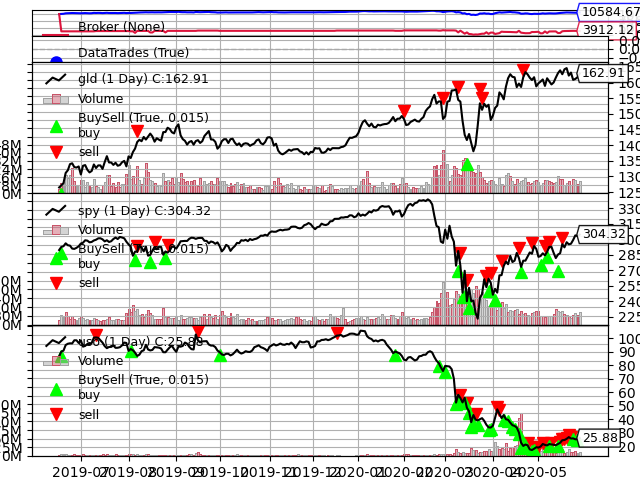

[[<Figure size 640x480 with 8 Axes>]]

In [8]:
cerebro.plot()